# VBM 661 Veri Görselleştirmesi Dersi Final Sınavı Projesi
Hazırlayan: N21239069 - Sercan Yıldırım

Vize Projesinde Kullanılan "Oldest People" veri kümesi yeterli coğrafi bilgi içermemesi, veri sayısının yetersiz olması sebebiyle "Nuclear Explosions" veri kümesi ile değiştirilmiştir. Piazza'daki excel tablosu güncellenmiştir.

Analiz Edilen Veri Kümesi: 1945-1998 Yılları Arasında Gerçekleşen Nükleer Patlamalar

Veri Linki: https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-08-20/nuclear_explosions.csv





**VERİ TANITIMI**

"Nuclear Explosions" veri kümesi "Stockholm International Peace Research Institute" tarafından sağlanmıştır. Yaklaşık 2 bin satırdan oluşmaktadır. Her satır bir nükleer patlamanın bilgilerini içermektedir.17 farklı sütuna sahiptir.

Bu sütun başlıkları ve içerikleri hakkında bilgiler:

* date_long = sıralı - patlamanın gerçekleştiği tarih
* year = sıralı - patlamanın gerçekleştiği yıl
* id_no = sıralı - patlamaya verilen biricik numara
* country = kategorik - patlamayı gerçekleştiren ülke
* region = kategorik - patlamanın gerçekleştiği bölge
* source = kategorik - patlama için gerekli olan kaynak
* latitude = sıralı - enlem
* longitude = sıralı - boylam
* magnitude_body = nicel(mb) - patlamanın kütlesel dalga büyüklüğü
* magnitude_surface = nicel(Ms) - patlamanın yeryüzünde oluşturduğu dalga büyüklüğü
* yield_lower = nicel - patlamanın kaç kiloton TNT patlamasına eş olduğunun alt sınır tahmini
* yield_upper = nicel - patlamanın kaç kiloton TNT patlamasına eş olduğunun üst sınır tahmini
* purpose = kategorik - patlamanın neden gerçekleştirildiği
* name = kategorik - mühimmatın adı
* type = kategorik - mühimmatın tipi

**Kütüphanelerin Eklenmesi ve Veri Düzenleme İşlemleri**

In [22]:
pip install folium

In [23]:
pip install plotly

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import folium
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
df=pd.read_csv(r'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-08-20/nuclear_explosions.csv', parse_dates=["date_long"])
df.head()
# githup üzerinden verinin okutulması gerçekleştirilmiştir.

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,name,type
0,1945-07-16,1945,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1,1945-08-05,1945,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
2,1945-08-09,1945,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
3,1946-06-30,1946,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
4,1946-07-24,1946,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW


In [27]:
from calendar import month_name

In [28]:
month_lookup = list(month_name)
# Aylık bazda zaman serisi oluşturulabilmesi için liste oluşturulmuştur

In [29]:
month_lookup=month_lookup[1:]

In [30]:
df.dtypes

date_long            datetime64[ns]
year                          int64
id_no                         int64
country                      object
region                       object
source                       object
latitude                    float64
longitude                   float64
magnitude_body              float64
magnitude_surface           float64
depth                       float64
yield_lower                 float64
yield_upper                 float64
purpose                      object
name                         object
type                         object
dtype: object

In [31]:
df["year"].min(),df["year"].max()
# Yıl değerlerinin maximum ve minimimuna bakılmıştır.

(1945, 1998)

In [32]:
df["month_name"]=df["date_long"].dt.month_name()

In [33]:
def weekdefine(x):
    if x in range(5,7):
        return "Weekends"
    else:
        return "Weekdays"
# Gerçekleşen patlamaların haftasonu yada haftaiçi olduğunu bildirecek fonksiyon tanımlanmıştır.

In [34]:
df["weekdays"]=df["date_long"].dt.weekday.apply(weekdefine)
# Gerçekleşen patlamaların haftaiçi/sonu olduğu yeni bir sütun olarak eklenmiştir.

# Zamansal Veri Görselleştirmesi Uygulamaları

Zaman Serileri Analizi için Plotly kütüphanesi kullanılmıştır. Yıllık ve Aylık serileri oluşturulmuştur.


Soru - 1 = 1945-1998 yılları arasında gerçekleşen yıllık nükleer patlama sayısı nedir?

Cevap - 1 = Şekil - 1  'de paylaşılan zaman serileri analizi gerçekleştirilmiştir. 1945'ten 1989'a kadar olan toplam değerler, zaman serileri kullanılarak gösterilmiştir. Zaman seri grafiği incelendiğinde önce artan sonra ise azalan bir eğilim olduğu ve aralarda dalgalanmaların olduğu farkedilmiştir.Gerçekleşen nükleer patlamaların 60'lı yıllarda en yüksek düzeye ulaştığı, sonrasında ise zamanla azaldığı sonucuna ulaşılmıştır.

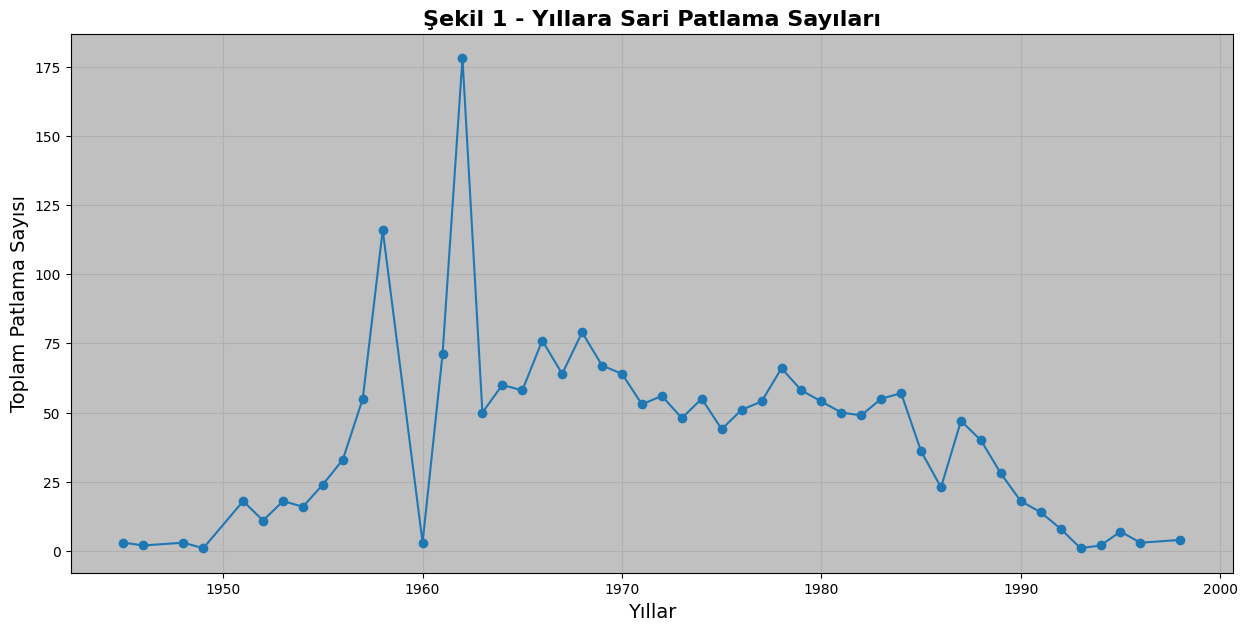

In [35]:
fig,ax=plt.subplots(figsize=(15,7))
df["year"].value_counts().sort_index().plot(marker="o")
ax.set_facecolor('silver')
ax.set_title("Şekil 1 - Yıllara Sari Patlama Sayıları",fontweight="bold",fontsize=16)
ax.set_ylabel("Toplam Patlama Sayısı",fontsize=14)
#ax.set_xticklabels(df["year"].sort_index(),rotation=90)
ax.set_xlabel("Yıllar",fontsize=14)
#ax.set_xticks(np.arange(1944,2005))
ax.grid()
plt.show()

Nükleer patlamaların mevsimlere göre durumlarının değerlendirilebilmesi için ay bazında bir zaman serisi oluşturulmuştur.

In [36]:
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
# Aylar bir listeye sırasıyla tanımlanmıştır.

In [37]:
type_month=pd.CategoricalDtype(sort_order,ordered=True)
df["month_name"]=df["month_name"].astype(type_month)

Soru - 2 = 1945'ten 1989'a kadar gerçekleşen nükleer patlamalar hangi ayda kaç adet gerçekleşmiştir ?

Cevap - 2 = Şekil-2'de görüldüğü üzere toplam nükleer patlama sayısı en yüksek değerine artan bir trend ile Ekim ayında ulaşmıştır. Eylül, Ekim aylarındaki bu yüksek değerlerin, Sonbahar mevsiminde nükleer patlama sayılarında bir artış olduğunu düşündürmektedir.

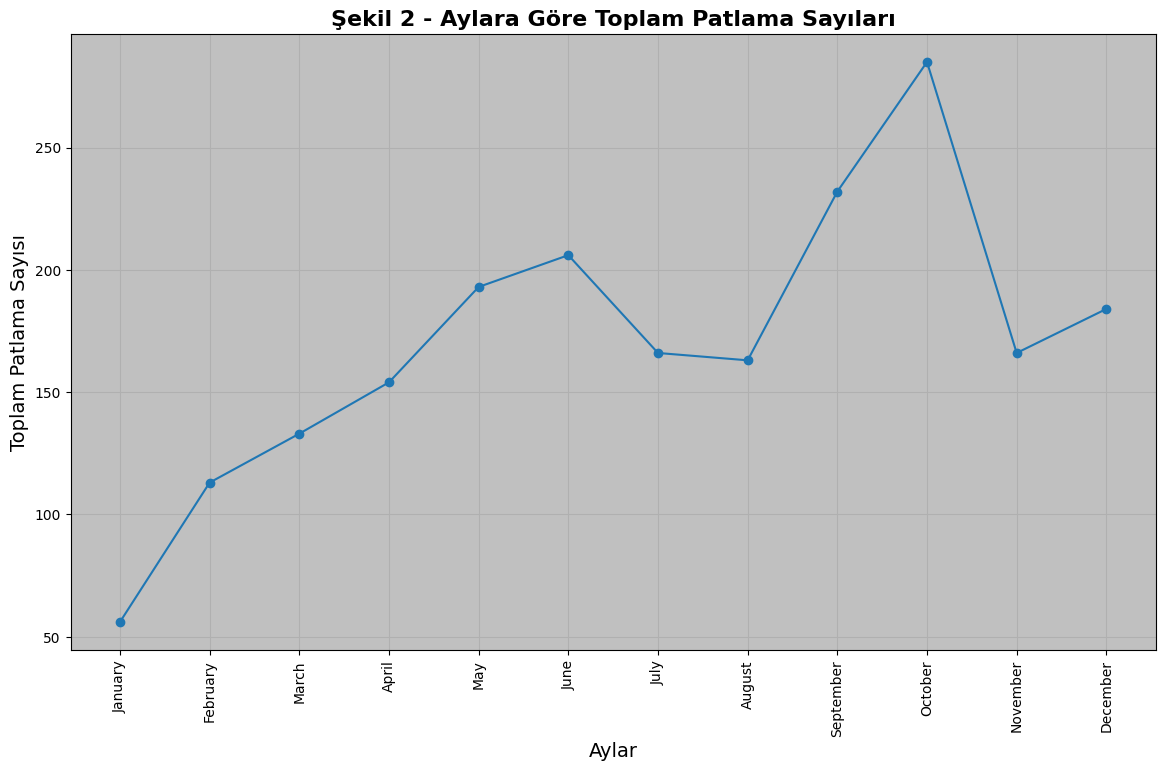

In [38]:
fig,ax=plt.subplots(figsize=(14,8))
df["month_name"].value_counts().sort_index().plot(figsize=(14,8),marker="o")
ax.set_xticks(np.arange(0,df["month_name"].nunique()))
ax.set_xticklabels(list(df["month_name"].value_counts().sort_index().index),rotation=90)
ax.set_facecolor("silver")
ax.set_title("Şekil 2 - Aylara Göre Toplam Patlama Sayıları",fontweight="bold",fontsize=16)
ax.set_ylabel("Toplam Patlama Sayısı",fontsize=14)
ax.set_xlabel("Aylar",fontsize=14)
ax.grid()

Soru - 3 = Hangi ülke toplam kaç adet nükleer patlatma gerçekleştirmiştir ?

Cevap - 3 = Ülkelerin gerçekleştirdiği nükleer patlatmaların grafiği Şekil-3'te paylaşılmıştır. Amerika ve Rusya(USSR)'nin diğer ülkelere nazaran daha fazla nükleer patlatmayı gerçekleştiren ülkeler olduğu anlaşılmıştır.

In [39]:
df_provience_bar=df["country"].value_counts().reset_index(name="Total Explossion")
df_provience_bar.rename(columns={"index":"Country"},inplace=True)


fig = px.bar(data_frame=df_provience_bar,
             x='country', y='Total Explossion',
)

fig.update_layout({'yaxis': {'title': {'text': '<b>Toplam Patlama Sayısı<b>'}},
                  'xaxis': {'title': {'text': '<b>Ülke<b>'}}})

fig.update_layout(title="<b>Şekil 3 - Ülkelerin Gerçekleştirdikleri Toplam Patlatma Sayıları</b>",autosize=False, width=900,height=550)

fig.show()


In [40]:
df.columns

Index(['date_long', 'year', 'id_no', 'country', 'region', 'source', 'latitude',
       'longitude', 'magnitude_body', 'magnitude_surface', 'depth',
       'yield_lower', 'yield_upper', 'purpose', 'name', 'type', 'month_name',
       'weekdays'],
      dtype='object')

In [21]:
df.groupby(["country","year"]).size().reset_index().query("country=='INDIA'")

,country,year,0
61,INDIA,1974,1
62,INDIA,1998,2


In [42]:
df["source"].nunique()

13

# Mekansal Veri Görselleştirmesi Uygulamaları

Mekansal veri görselleştirmesi çalışmları sırasında, Python'da haritalandırma için sıklıkla tercih edilen "folium" kütüphanesi tercih edilmiştir. Veri kümesi incelendiğinde nükleer patlatmaları gerçekleştiren 7 farklı ülkenin dünyanın değişik alanlarında bu çalışmaları yürüttüğü farkedilmiştir. Bu 7 farklı ülke için haritalandırılmış görseller oluşturulmuştur. Patlamaların yaşandığı her noktaya bir pin eklenmiştir. Pinlerin üzerine gelip beklendiklerinde  alan(region) bilgisi kullanıcıya sunulmaktadır.

Harita üzerinde yakışlaşıp uzaklaşma, gezinme işlemleri gerçekleştirilebilmektedir.




Soru - 1 = Amerika tarafından gerçekleştirilen nükleer patlatmalar dünyanın nerelerinde gerçekleştirilmiştir ?

Cevap - 1 = Şekil-4'te gösterildiği üzere Amerika yaptığı nükleer patlatmaların çoğunu kendi kara sınırlarında icra etmesine rağmen dünyanın genelinde de ciddi miktarda patlatma gerçekleştirmiş durumdadır. Okyanuslar, Asya, Arap Yarım Adası çevresi ve Rusya yakınlarında Amerika'nın gerçekleştirdiği nükleer patlatmalar tespit edilmiştir.

In [43]:
df_USA=df.query("country=='USA'")
f = folium.Figure(width=1250, height=600)
m=folium.Map(location=[22.154741532331844, -29.671095369174065],zoom_start=2.2).add_to(f)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Şekil 4 - Amerika Tarafından Gerçekleştirilmiş Patlatma Lokasyonları</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))




for row in df_USA.iterrows():
    row_values=row[1]
    location=[row_values["latitude"],row_values["longitude"]]
    popup=popup='<strong>' + row_values["region"] + '</strong>'
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(m)




display(m)

Soru - 2 = Rusya tarafından gerçekleştirilen nükleer patlatmalar dünyanın nerelerinde gerçekleştirilmiştir ?

Cevap - 2 = Şekil-5'te görüldüğü üzere Rusya, gerçekleştirdiği patlatmaların çoğunu kendi ve SSCB(USSR) içerisinde yer alan ülkelerin karasal sınırları içerisinde icra etmiştir.


In [44]:
df_USSR=df.query("country=='USSR'")
f = folium.Figure(width=1250, height=600)
m=folium.Map(location=[61.12620774133959, 76.67656215147754],zoom_start=3).add_to(f)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Şekil 5 - Rusya Tarafından Gerçekleştirilmiş Patlatma Lokasyonları</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))




for row in df_USSR.iterrows():
    row_values=row[1]
    location=[row_values["latitude"],row_values["longitude"]]
    popup=popup='<strong>' + row_values["region"] + '</strong>'
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(m)




display(m)

Soru - 3 = İngiltere tarafından gerçekleştirilen nükleer patlatmalar dünyanın nerelerinde gerçekleştirilmiştir ?

Cevap - 3 = İngiltere tarafından gerçekleştirilen patlatmalar diğer ülkelerden farklı olarak kendi kara sınırlarına uzak noktalarda icra edilmiştir. Pasifik okyanusu ve Amerika/Avustralya kara sınırları örnek olarak verilebilir. Şekil-6'da ilgili patlatma noktaları işaretlenmiştir.


In [45]:
df_UK=df.query("country=='UK'")
f = folium.Figure(width=1250, height=600)
m=folium.Map(location=[11.660730843696962, -19.12422161841018],zoom_start=2).add_to(f)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Şekil 6 - İngiltere Tarafından Gerçekleştirilmiş Patlatma Lokasyonları</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))




for row in df_UK.iterrows():
    row_values=row[1]
    location=[row_values["latitude"],row_values["longitude"]]
    popup=popup='<strong>' + row_values["region"] + '</strong>'
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(m)




display(m)

Soru - 4 = Fransa tarafından gerçekleştirilen nükleer patlatmalar dünyanın nerelerinde gerçekleştirilmiştir ?

Cevap - 4 = Şekil-7'de Fransa tarafından icra edilen nükleer patlatmalar gösterilmiştir. Çoğunluk patlamaların Pasific okyanusu ve sömürgesi olan Cezayir'de gerçekleştirilmesi dikkat çekmiştir.

In [46]:
df_FR=df.query("country=='FRANCE'")
f = folium.Figure(width=1250, height=600)
m=folium.Map(location=[-1.0898935047816531, -62.27851579506027],zoom_start=3).add_to(f)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Şekil 7 - Fransa Tarafından Gerçekleştirilmiş Patlatma Lokasyonları</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))




for row in df_FR.iterrows():
    row_values=row[1]
    location=[row_values["latitude"],row_values["longitude"]]
    popup=popup='<strong>' + row_values["region"] + '</strong>'
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(m)




display(m)

Soru - 5 = Çin tarafından gerçekleştirilen nükleer patlatmalar dünyanın nerelerinde gerçekleştirilmiştir?

Cevap - 5 = Şekil-8'de Çin tarafından icra edilen nükleer patlatmalar gösterilmiştir. Çin devleti icra ettiği tüm nükleer patlatmaları kendi kara sınırları içersinde gerçekleştirmiştir.

In [47]:
df_CH=df.query("country=='CHINA'")
f = folium.Figure(width=1250, height=600)
m=folium.Map(location=[42.56044463864093, 87.04839056496782],zoom_start=5).add_to(f)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Şekil 8 - Çin Tarafından Gerçekleştirilmiş Patlatma Lokasyonları</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))




for row in df_CH.iterrows():
    row_values=row[1]
    location=[row_values["latitude"],row_values["longitude"]]
    popup=popup='<strong>' + row_values["region"] + '</strong>'
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(m)




display(m)

Soru - 6 = Hindistan tarafından gerçekleştirilen nükleer patlatmalar dünyanın nerelerinde gerçekleştirilmiştir ?

Cevap - 6 = Şekil-9'de Hindistan tarafından icra edilen nükleer patlatmalar gösterilmiştir. Hindistan sadece 2 adet patlatma icra etmiştir. İkiside kendi kara sınırları içerisindedir.

In [48]:
df_IND=df.query("country=='INDIA'")
f = folium.Figure(width=1250, height=600)
m=folium.Map(location=[26.203847245564795, 71.84331269338423],zoom_start=5).add_to(f)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Şekil 9 - Hindistan Tarafından Gerçekleştirilmiş Patlatma Lokasyonları</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))




for row in df_IND.iterrows():
    row_values=row[1]
    location=[row_values["latitude"],row_values["longitude"]]
    popup=popup='<strong>' + row_values["region"] + '</strong>'
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(m)




display(m)

Soru - 7 = Pakistan tarafından gerçekleştirilen nükleer patlatmalar dünyanın nerelerinde gerçekleştirilmiştir ?

Cevap - 7 = Şekil-10'da Pakistan tarafından icra edilen nükleer patlatmalar gösterilmiştir. Pakistan sadece 2 adet patlatma icra etmiştir. İkiside kendi kara sınırları içerisindedir.

In [49]:
df_PK=df.query("country=='PAKIST'")
f = folium.Figure(width=1250, height=600)
m=folium.Map(location=[28.802900480183254, 64.13091034963422],zoom_start=6).add_to(f)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Şekil 10 - Pakistan Tarafından Gerçekleştirilmiş Patlatma Lokasyonları</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))




for row in df_PK.iterrows():
    row_values=row[1]
    location=[row_values["latitude"],row_values["longitude"]]
    popup=popup='<strong>' + row_values["region"] + '</strong>'
    marker=folium.Marker(location=location,popup=popup)
    marker.add_to(m)




display(m)

# İnteraktif Veri Görselleştirmesi Uygulamaları
İnteraktif Veri Görselleştirmesi uygulamalarından animasyon'da Plotly express kütüphanesi; etkileşimli grafik çizdirmede ise Plotly Graph Object kütüphanesi tercih edilmiştir.


Soru - 1 = 1945'ten 1998'e kadar dünya üzerinde gerçekleşen nükleer patlamalar kronolojik olarak nerelerde gerçekleştirilmiştir ?

Cevap - 1 = Şekil-11'de izlendiği üzere nükleer patlamaların büyük çoğunluğunun 70'li yıllarda Asya'da meydana gelmiştir. Bunun yanı sıra 1990'lara yaklaştıkça patlama sayılarında ciddi oranda azalmalar görülmüştür.

60'lı yılların başında Rusya'nın kuzeyinde meydana gelen yoğun nükleer patlama yoğunluğu animasyonda dikkat çekmektedir.

In [50]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", animation_group="country",
                   size_max=14, zoom=.5,animation_frame="year", hover_name="country",
                  mapbox_style="carto-positron")

fig.update_layout(title="<b>Şekil 11 - 1945-1998 Yılları Arasında Gerçekleşen Nükleer Patlamaların Kronolojik Gösterimi</b>",autosize=False, width=1000,height=700)
fig.show()

Soru - 2 = Ülkelerin icra ettiği yıllık nükleer patlatma sayıları nelerdir ?

Cevap - 2 = Şekil-12'de sunulan etkileşimli grafik sayesinde dropdown menüden seçilen ülke isimlerine göre ülke bazlı yıllık patlama sayıları filtrelenebilmektedir. Filtreleme yapılmasına ek olarak, baştaki filtresiz haline dönebilmesi için "Tüm Ülkeler" seçeneği de eklenmiştir. Grafik üzerindeki belirli bir bardaki değerin okunması için imlecin ilgili barın üzerine getirilmesi yeterlidir. Yıl, patlama sayısı ve ülke bilgisi kullanıcıya bilgi balonu şeklinde sunulmaktadır.

Ülke bazlı yapılan filtreleme işlemininin yanısıra grafik üzerinde belirli bir zaman aralığı seçilerek ilgili dönem için detaylı inceleme yapılabilmektedir. Keza seçilen zaman diliminin iptal edilerek baştan sona verilere tekrar erişmek için çift tıklamak yeterli olmaktadır.

Yapılan etkileşimli grafik incelemleri sonrası, Amerika ve Rusya'nın nükleer anlamda çalışmalarının diğer ülkelere göre çok daha yüksek olduğu anlaşılmıştır. Buna ek olarak 60'lı yılların nükleer patlamalar için en yoğun zaman dilimi olduğu sonucuna varılmıştır.

In [51]:
countries=list(df.country.unique())
countries

['USA', 'USSR', 'UK', 'FRANCE', 'CHINA', 'INDIA', 'PAKIST']

In [52]:
countries=list(df.country.unique())
countries[0]="USA"
countries[1]="USSR"
countries[2]="UK"
countries[3]="FRANCE"
countries[4]="CHINA"
countries[5]="INDIA"
countries[6]="PAKIST"

In [53]:
fig=go.Figure()

df2_grouped=df.groupby(["country","year"]).size().reset_index()
df2_grouped.rename(columns={0:"Total"},inplace=True)
df2_grouped.sort_values(by="year",inplace=True)


for country in countries:


    df_filted_on_countries=df2_grouped[df2_grouped.country==country]
    fig.add_trace(go.Bar(x=df_filted_on_countries["year"],y=df_filted_on_countries["Total"],name=country))

dropdown_buttons=[{"label":"USA","method":"update",
                  "args":[{"visible":[True,False,False,False,False,False,False,False]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>USA<br>"}
                         ]},

                  {"label":"USSR","method":"update",
                  "args":[{"visible":[False,True,False,False,False,False,False,False]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>USSR<br>"}
                         ]},


                  {"label":"UK","method":"update",
                  "args":[{"visible":[False,False,True,False,False,False,False,False]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>UK<br>"}
                         ]},

                  {"label":"FRANCE","method":"update",
                  "args":[{"visible":[False,False,False,True,False,False,False,False]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>FRANCE<br>"}
                         ]},

                  {"label":"CHINA","method":"update",
                  "args":[{"visible":[False,False,False,False,True,False,False,False]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>CHINA<br>"}
                         ]},


                  {"label":"INDIA","method":"update",
                  "args":[{"visible":[False,False,False,False,False,True,False,False]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>INDIA<br>"}
                         ]},

                  {"label":"PAKIST","method":"update",
                  "args":[{"visible":[False,False,False,False,False,False,True,False]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>PAKIST<br>"}
                         ]},
                  {"label":"Tüm Ülkeler","method":"update",
                  "args":[{"visible":[True,True,True,True,True,True,True,True]},
                         {"title":"<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b><br><br>TÜM ÜLKELER<br>"}
                         ]}

                  ]

fig.update_layout({
    "updatemenus":[{"type":"dropdown",
                    "x":1.2,"y":.65,
                    "showactive":True,
                    "active":7,
                    "buttons":dropdown_buttons
                   }]
                 })

fig.update_layout({'yaxis': {'title': {'text': '<b>Toplam Patlama Sayısı<b>'}},
                  'xaxis': {'title': {'text': '<b>Yıllar<b>'}}})

fig.update_layout(title="<b>Şekil 12 - Ülkelere Göre Yıllara Sari Toplam Patlama Sayıları</b>",autosize=False, width=900,height=650, margin=dict(t=150))
fig.show()

In [54]:
df

,date_long,year,id_no,country,region,source,latitude,longitude,magnitude_body,magnitude_surface,depth,yield_lower,yield_upper,purpose,name,type,month_name,weekdays
0,1945-07-16,1945,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER,July,Weekdays
1,1945-08-05,1945,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,August,Weekends
2,1945-08-09,1945,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP,August,Weekdays
3,1946-06-30,1946,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP,June,Weekends
4,1946-07-24,1946,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW,July,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1996-07-29,1996,96003,CHINA,LOP NOR,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,WR,NaN,UG,July,Weekdays
2047,1998-05-11,1998,98001,INDIA,POKHRAN,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,WR,SHAKTI 1-3,UG,May,Weekdays
2048,1998-05-13,1998,98003,INDIA,POKHRAN,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,WR,NaN,UG,May,Weekdays
2049,1998-05-28,1998,98004,PAKIST,CHAGAI,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,WR,NaN,UG,May,Weekdays


In [55]:
df["country"].value_counts().reset_index()

,country,count
0,USA,1032
1,USSR,714
2,FRANCE,210
3,UK,45
4,CHINA,45
5,INDIA,3
6,PAKIST,2


# Sonuç

Yapılan çalışma sonucu, verilerin doğru ve uygun görşelleştirme teknikleri kullanılarak sunulmasının kullanıcılarda oluşacak algıyı ciddi derecede etkilediği anlaşılmıştır. Basit bir anlatım ile verilmek istenen mesajın iletilmesinin kritik olduğu değerlendirilmiştir.  